
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>
    Armin Ghojehzadeh

____

# 🔴 **Import Libs**

In [1]:
# changing the versions to proper ones
!pip uninstall -y torchtext torch
!pip install torch==2.1.0
!pip install torchtext==0.15.2
!pip install torchmetrics

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.6 MB/s eta 0:00:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torchtext

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from torch import optim
from torch.nn import functional as F

import tqdm
import torchmetrics as tm

In [3]:
!python --version
print(torch.__version__)
print(torchtext.__version__)

Python 3.10.12
2.0.1+cu117
0.15.2+cpu


In [4]:
for lib in [np, torch, torchtext, tqdm]:
  print(lib.__name__, '-->', lib.__version__)

numpy --> 1.26.4
torch --> 2.0.1+cu117
torchtext --> 0.15.2+cpu
tqdm --> 4.67.1


# 🔴 **Utils**

In [5]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [6]:
def num_trainable_params(model):
  nums = sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6
  return nums

# 🔴 **Dataset**

In [7]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## 🟠 **Load the Dataset**

🔰 In this session you should load WikiText2 dataset.

In [8]:
# from torchtext.datasets import WikiText2

# train_iter, valid_iter, test_iter = WikiText2(split=('train', 'valid', 'test'))


In [9]:
from datasets import load_dataset

dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

train_iter = dataset['train']
valid_iter = dataset['validation']
test_iter = dataset['test']

print("Example lines from the WikiText2 training dataset:")
for i, line in enumerate(train_iter['text']):
    print(line)
    if i == 2:
        break


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Example lines from the WikiText2 training dataset:

 = Valkyria Chronicles III = 




## 🟠 **Build vocabulary and save it**

🔰 In this section we need to:

*   Define a tokenizer using `basic_english`
*   Tokenize the dataset and collect tokens
*   Build the vocabulary using `build_vocab_from_iterator`
*   Manually insert special tokens and set the default index


In [10]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for text in data_iter['text']:
        if text.strip():
            yield tokenizer(text)

# Build the vocabulary
special_tokens = ["<unk>", "<pad>", "<bos>", "<eos>"]
vocab = build_vocab_from_iterator(yield_tokens(dataset['train']), specials=special_tokens)

# Manually set the default index
vocab.set_default_index(vocab["<unk>"])

print("Vocabulary size:", len(vocab))
print("Example tokens:", vocab(["this", "is", "an", "example"]))
print("Special tokens indices:", {token: vocab[token] for token in special_tokens})

# Save the vocabulary
import pickle

with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

print("Vocabulary saved to vocab.pkl")


Vocabulary size: 66061
Example tokens: [38, 26, 33, 619]
Special tokens indices: {'<unk>': 0, '<pad>': 1, '<bos>': 2, '<eos>': 3}
Vocabulary saved to vocab.pkl


## 🟠 EDA

### 🟡 Let's explore the WikiText2 dataset!

### 🟡 Calculate basic statistics such as the number of documents, total words, average document length, etc.

In [ ]:
def calculate_statistics(split):
    total_documents = len(split['text'])  # Number of lines/documents
    total_words = 0
    total_characters = 0
    document_lengths = []

    for document in split['text']:
        if document.strip():  # Ignore empty lines
            tokens = tokenizer(document)
            total_words += len(tokens)
            total_characters += len(document)
            document_lengths.append(len(tokens))

    average_document_length = total_words / total_documents if total_documents > 0 else 0
    return {
        "total_documents": total_documents,
        "total_words": total_words,
        "total_characters": total_characters,
        "average_document_length": average_document_length,
        "max_document_length": max(document_lengths) if document_lengths else 0,
        "min_document_length": min(document_lengths) if document_lengths else 0,
    }

train_stats = calculate_statistics(train_iter)
valid_stats = calculate_statistics(valid_iter)
test_stats = calculate_statistics(test_iter)

print("Train Dataset Statistics:", train_stats)
print("Validation Dataset Statistics:", valid_stats)
print("Test Dataset Statistics:", test_stats)


Train Dataset Statistics: {'total_documents': 36718, 'total_words': 2051665, 'total_characters': 10892990, 'average_document_length': 55.87627321749551, 'max_document_length': 696, 'min_document_length': 1}
Validation Dataset Statistics: {'total_documents': 3760, 'total_words': 214665, 'total_characters': 1142150, 'average_document_length': 57.09175531914894, 'max_document_length': 433, 'min_document_length': 1}
Test Dataset Statistics: {'total_documents': 4358, 'total_words': 242156, 'total_characters': 1285622, 'average_document_length': 55.56585589720055, 'max_document_length': 478, 'min_document_length': 1}


### 🟡 Analyze the most common and least common words in the dataset.

In [11]:
from collections import Counter

# count word frequencies in the entire dataset
def count_word_frequencies(data_splits):
    word_counter = Counter()
    for split in data_splits:
        for document in split['text']:
            if document.strip():
                tokens = tokenizer(document)
                word_counter.update(tokens)
    return word_counter

# Combine all splits
data_splits = [train_iter, valid_iter, test_iter]

word_frequencies = count_word_frequencies(data_splits)

# Analyze most common and least common words
most_common_words = word_frequencies.most_common(10)  # Top 10 most common words
# least_common_words = [word for word, freq in word_frequencies.items() if freq == 1]  # Words with frequency 1
least_common_words = word_frequencies.most_common()[:-11:-1]

print("Most Common Words Across Entire Dataset:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

print("Least Common Words Across Entire Dataset:")
for word, freq in least_common_words:
    print(f"{word}: {freq}")

# print("\nNumber of Least Common Words (appearing once):", len(least_common_words))
# print("Some Least Common Words:", least_common_words[:10])  # Display first 10 least common words


Most Common Words Across Entire Dataset:
the: 161567
,: 124599
.: 103392
of: 69747
and: 61965
in: 54852
to: 48467
a: 44313
=: 35977
was: 25907
Least Common Words Across Entire Dataset:
pelkey: 1
parlayed: 1
belated: 1
touchstones: 1
dede: 1
laurels: 1
schüfftan: 1
callahan: 1
spellbinds: 1
strays: 1


### 🟡  Please proceed with further exploration of the dataset. what do you suggest?


### **1. Document Length Distribution**
**Why Important?**
- Understanding the distribution of document lengths will help you decide:
  - **Input sequence length** (`seq_len`) for the LSTM.
  - Whether padding or truncation is necessary during training.


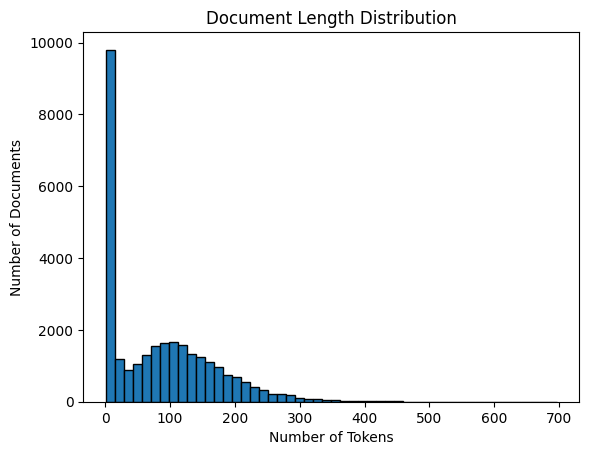

In [ ]:
document_lengths = []
for split in data_splits:
    for document in split['text']:
        if document.strip():
            tokens = tokenizer(document)
            document_lengths.append(len(tokens))

plt.hist(document_lengths, bins=50, edgecolor='black')
plt.title("Document Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Documents")
plt.show()


### **2. Vocabulary Coverage Analysis**
**Why Important?**
- This will help you determine how many words are needed to cover a significant portion of the dataset.
- For example, you might limit your vocabulary size to **top-N frequent words** to reduce model complexity while retaining meaningful data.


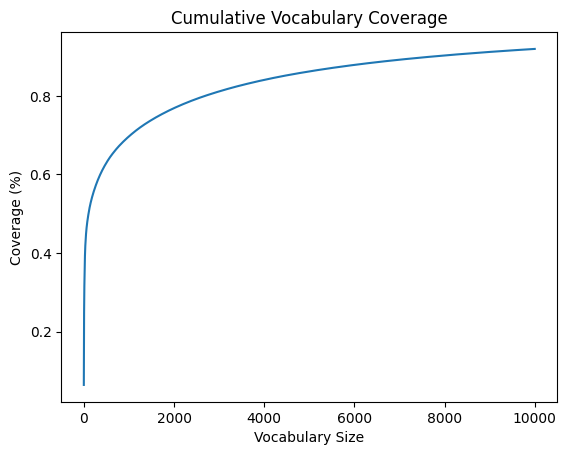

In [ ]:
total_tokens = sum(word_frequencies.values())
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)
cumulative_coverage = [sum(sorted_frequencies[:i]) / total_tokens for i in range(1, len(sorted_frequencies)+1)]

plt.plot(cumulative_coverage[:10000])  # Top 10,000 words
plt.title("Cumulative Vocabulary Coverage")
plt.xlabel("Vocabulary Size")
plt.ylabel("Coverage (%)")
plt.show()

### **3. Rare Words Analysis**
**Why Important?**
- Rare words (those that appear infrequently, such as only once or a few times) can:
  - Add noise to the model if they're not important.
  - Increase vocabulary size unnecessarily.
  - Be replaced with an `<unk>` token to simplify the vocabulary.
  - Helps decide on a **vocabulary size cutoff**.
   - For example, exclude words that appear fewer than a certain number of times.
  - Provides insights into the **long-tail distribution** of your vocabulary.
   - Large datasets often have many rare words, which might contribute little to performance.
  - Simplifies the model:
   - Replacing rare words with `<unk>` can improve generalization and reduce computation.


In [ ]:
rare_threshold = 5  # Words appearing 5 times or fewer are considered rare

rare_words_count = sum(1 for freq in word_frequencies.values() if freq <= rare_threshold)

total_vocab_size = len(word_frequencies)
rare_words_percentage = (rare_words_count / total_vocab_size) * 100

print(f"Number of rare words (appearing ≤ {rare_threshold} times): {rare_words_count}")
print(f"Percentage of rare words in the vocabulary: {rare_words_percentage:.2f}%")

Number of rare words (appearing ≤ 5 times): 51908
Percentage of rare words in the vocabulary: 71.30%


## 🟠 Transform the data

🛑 Make sure to perform the transformations on train, validation and test datasets.

🔰 Reshape the dataset into an `N x B x L` or `M x L` format, where `N` represents the number of batches, `B` is the batch size, `L` is the length of a sample within each batch, and `M` is equal to `N x B`.

In [ ]:
# def data_process(raw_text_iter, batch_size, seq_len):

#     return inputs, targets

In [16]:
def process_data(raw_text_iter, batch_size, seq_len):

    all_tokens = [vocab[token] for text in raw_text_iter for token in tokenizer(text["text"])]
    all_tokens = torch.tensor(all_tokens, dtype=torch.long)

    total_length = len(all_tokens)
    effective_length = (total_length // (batch_size * seq_len)) * (batch_size * seq_len)
    all_tokens = all_tokens[:effective_length]
    data = all_tokens.view(batch_size, -1)
    inputs = []
    targets = []
    for i in range(0, data.size(1) - seq_len, seq_len):
        input_batch = data[:, i:i + seq_len]
        target_batch = data[:, i + 1:i + seq_len + 1]
        inputs.append(input_batch)
        targets.append(target_batch)

    inputs = torch.stack(inputs)
    targets = torch.stack(targets)
    inputs = inputs.view(-1, seq_len)
    targets = targets.view(-1, seq_len)

    return inputs, targets

# Parameters
batch_size = 32
seq_len = 34

train_inputs, train_targets = process_data(train_iter, batch_size, seq_len)
valid_inputs, valid_targets = process_data(valid_iter, batch_size, seq_len)
test_inputs, test_targets = process_data(test_iter, batch_size, seq_len)

print("Train Inputs Shape:", train_inputs.shape)
print("Train Targets Shape:", train_targets.shape)

Train Inputs Shape: torch.Size([60288, 34])
Train Targets Shape: torch.Size([60288, 34])


## 🟠 Custom dataset

🔰 Write a custom dataset class for LanguageModelDataset.

In [17]:
from torch.utils.data import Dataset

class LanguageModelDataset(Dataset):
    def __init__(self, inputs, targets):

        self.inputs = inputs
        self.targets = targets

    def __len__(self):

        return len(self.inputs)

    def __getitem__(self, idx):

        return self.inputs[idx], self.targets[idx]


In [18]:
train_dataset = LanguageModelDataset(train_inputs, train_targets)
valid_dataset = LanguageModelDataset(valid_inputs, valid_targets)
test_dataset = LanguageModelDataset(test_inputs, test_targets)

# a single sample
sample_input, sample_target = train_dataset[0]
print("Sample Input:", sample_input)
print("Sample Target:", sample_target)

# Dataset length
print("Number of samples in training set:", len(train_dataset))


Sample Input: tensor([   12,  3874,  3890,   885,    12, 20488,    86,  3874,    90, 24097,
         3890,    24,   785, 29473,     5,  6081,     6,  3874,     7,     4,
         5054,    90,    23,     5,  1840,  1016,    10,    17,  3874,  3890,
          885,   634,   980,     5])
Sample Target: tensor([ 3874,  3890,   885,    12, 20488,    86,  3874,    90, 24097,  3890,
           24,   785, 29473,     5,  6081,     6,  3874,     7,     4,  5054,
           90,    23,     5,  1840,  1016,    10,    17,  3874,  3890,   885,
          634,   980,     5,    26])
Number of samples in training set: 60288


## 🟠 Define a dataloader if needed

🔰 Write dataloaders for the training, validation, and test sets.

In [19]:
from torch.utils.data import DataLoader

loader_batch_size = batch_size

train_loader = DataLoader(train_dataset, batch_size=loader_batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=loader_batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=loader_batch_size, shuffle=False)

for inputs, targets in train_loader:
    print("Inputs shape:", inputs.shape)
    print("Targets shape:", targets.shape)
    break

Inputs shape: torch.Size([32, 34])
Targets shape: torch.Size([32, 34])


# 🔴 **Model**

🔰 Use the following template to create a custom model.

Your model should consist of three parts:

*   an embedding layer
*   an LSTM layer
*   a fully connected layer

In [20]:
import torch
from torch import nn

class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate):

        super(LanguageModel, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=dropout_rate,
            batch_first=True
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, src):

        embedded = self.embedding(src)

        lstm_out, _ = self.lstm(embedded)

        output = self.fc(lstm_out)

        return output


In [21]:
# Parameters
vocab_size = len(vocab)
embedding_dim = 128
hidden_dim = 256
num_layers = 2
dropout_rate = 0.3

model = LanguageModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate)

print("Number of Trainable Parameters:", num_trainable_params(model))

# Example input
batch_size = 32
seq_len = 35
dummy_input = torch.randint(0, vocab_size, (batch_size, seq_len))


output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: (batch_size, seq_len, vocab_size)


Number of Trainable Parameters: 26.355085
Output shape: torch.Size([32, 35, 66061])


# 🔴 **Config**

🔰 Define the optimizer, loss function, metrics and other necessary parameters in this section, and ensure the model is sent to the appropriate device.

In [22]:
import torch
from torch import nn, optim
from torchmetrics.text import Perplexity
from torchmetrics import Accuracy

# Device configuration
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Model hyperparameters
vocab_size = len(vocab)
embedding_dim = 128
hidden_dim = 256
num_layers = 2
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 5

model = LanguageModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

perplexity_metric = Perplexity(ignore_index=0).to(device)  # Ignore padding index if applicable
accuracy_metric = Accuracy(task="multiclass", num_classes=vocab_size).to(device)

print("Configuration complete.")

Using device: cuda
Configuration complete.


# 🔴 **Train ➰**

🔰 This is the template for train function, change it if needed.

In [ ]:
# def train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch=None):
#   model.train()
#   loss_train = AverageMeter()
#   metric.reset()

#   with tqdm.tqdm(train_loader, unit='batch') as tepoch:
#     for inputs, targets in tepoch:
#       if epoch:
#         tepoch.set_description(f'Epoch {epoch}')

#       inputs = inputs.to(device)
#       targets = targets.to(device)

#       outputs = model(inputs)

#       loss = loss_fn(outputs, targets)

#       loss.backward()

#       optimizer.step()
#       optimizer.zero_grad()

#       loss_train.update(loss.item(), n=len(targets))
#       metric.update(outputs, targets)

#       tepoch.set_postfix(loss=loss_train.avg, metric=metric.compute().item())

#   return model, loss_train.avg, metric.compute().item()


In [37]:
from tqdm import tqdm

def train_one_epoch(model, train_loader, loss_fn, optimizer, perplexity_metric, accuracy_metric, device, epoch=None):

    model.train()
    loss_train = AverageMeter()
    perplexity_metric.reset()
    accuracy_metric.reset()

    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch:
                tepoch.set_description(f"Epoch {epoch}")

            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)

            loss = loss_fn(outputs.view(-1, outputs.size(-1)), targets.view(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update metrics
            perplexity_metric.update(outputs, targets)  # Use original shape for perplexity
            accuracy_metric.update(outputs.argmax(dim=-1), targets)  # Use argmax for accuracy
            loss_train.update(loss.item(), n=len(targets))

            tepoch.set_postfix(
                loss=loss_train.avg,
                perplexity=perplexity_metric.compute().item(),
                accuracy=accuracy_metric.compute().item()
            )

    return model, loss_train.avg, perplexity_metric.compute().item(), accuracy_metric.compute().item()


# 🔴 **Evaluation**

🔰 This is the template for evaluation function, change it if needed.

In [24]:
# def evaluate(model, test_loader, loss_fn, metric):
#   model.eval()
#   loss_eval = AverageMeter()
#   metric.reset()

#   with torch.inference_mode():
#     for inputs, targets in test_loader:
#       inputs = inputs.to(device)
#       targets = targets.to(device)

#       outputs = model(inputs)

#       loss = loss_fn(outputs, targets)
#       loss_eval.update(loss.item(), n=len(targets))

#       metric(outputs, targets)

#   return loss_eval.avg, metric.compute().item()

In [38]:
def evaluate(model, test_loader, loss_fn, perplexity_metric, accuracy_metric, device):

    model.eval()
    loss_eval = AverageMeter()
    perplexity_metric.reset()
    accuracy_metric.reset()

    with torch.inference_mode():
        for inputs, targets in test_loader:

            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)

            loss = loss_fn(outputs.view(-1, outputs.size(-1)), targets.view(-1))
            loss_eval.update(loss.item(), n=len(targets))

            perplexity_metric.update(outputs, targets)
            accuracy_metric.update(outputs.argmax(dim=-1), targets)

    return loss_eval.avg, perplexity_metric.compute().item(), accuracy_metric.compute().item()


# 🔴 **Training Process 〽️**

## 🟠 Finding Hyper-parameters

### 🟡 **Step 1:** Calculate the loss for an untrained model using a few batches.


In [27]:
model = LanguageModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    dropout_rate=dropout_rate
).to(device)

total_loss = 0.0
num_batches = 5

# Iterate over multiple batches
for batch_idx, (inputs, targets) in enumerate(train_loader):
    if batch_idx >= num_batches:
        break

    inputs = inputs.to(device)
    targets = targets.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        total_loss += loss.item()

    print(f"Batch {batch_idx + 1}/{num_batches} Loss: {loss.item():.4f}")

average_loss = total_loss / num_batches
print(f"Average Loss over {num_batches} Batches (Untrained Model): {average_loss:.4f}")

Batch 1/5 Loss: 11.0970
Batch 2/5 Loss: 11.0970
Batch 3/5 Loss: 11.0965
Batch 4/5 Loss: 11.0979
Batch 5/5 Loss: 11.0952
Average Loss over 5 Batches (Untrained Model): 11.0967


### 🟡 **Step 2:** Try to train and overfit the model on a small subset of the dataset.

In [31]:
from torch.utils.data import Subset

indices = list(range(1000))
train_dataset_subset = Subset(train_dataset, indices)

subset_loader = torch.utils.data.DataLoader(
    train_dataset_subset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

model = LanguageModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    dropout_rate=dropout_rate
).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

num_epochs = 50

for epoch in range(1, num_epochs + 1):
    model, train_loss, train_perplexity, train_accuracy = train_one_epoch(
        model=model,
        train_loader=subset_loader,
        loss_fn=criterion,
        optimizer=optimizer,
        perplexity_metric=perplexity_metric,
        accuracy_metric=accuracy_metric,
        device=device,
        epoch=epoch
    )

    print(f"Epoch {epoch}/{num_epochs} - Loss: {train_loss:.4f}, "
          f"Perplexity: {train_perplexity:.4f}, Accuracy: {train_accuracy:.4f}")


Epoch 1: 100%|██████████| 32/32 [00:02<00:00, 15.35batch/s, accuracy=0.0478, loss=10.9, perplexity=5.46e+4]


Epoch 1/50 - Loss: 10.9069, Perplexity: 54551.9609, Accuracy: 0.0478


Epoch 2: 100%|██████████| 32/32 [00:01<00:00, 16.04batch/s, accuracy=0.0489, loss=9.16, perplexity=9.48e+3]


Epoch 2/50 - Loss: 9.1569, Perplexity: 9479.6475, Accuracy: 0.0489


Epoch 3: 100%|██████████| 32/32 [00:02<00:00, 15.61batch/s, accuracy=0.0611, loss=8.29, perplexity=3.99e+3]


Epoch 3/50 - Loss: 8.2904, Perplexity: 3985.5251, Accuracy: 0.0611


Epoch 4: 100%|██████████| 32/32 [00:02<00:00, 14.66batch/s, accuracy=0.0609, loss=7.96, perplexity=2.88e+3]


Epoch 4/50 - Loss: 7.9645, Perplexity: 2877.1328, Accuracy: 0.0609


Epoch 5: 100%|██████████| 32/32 [00:02<00:00, 15.35batch/s, accuracy=0.0646, loss=7.7, perplexity=2.2e+3]


Epoch 5/50 - Loss: 7.6978, Perplexity: 2203.4124, Accuracy: 0.0646


Epoch 6: 100%|██████████| 32/32 [00:02<00:00, 15.87batch/s, accuracy=0.0727, loss=7.48, perplexity=1.77e+3]


Epoch 6/50 - Loss: 7.4794, Perplexity: 1771.2667, Accuracy: 0.0727


Epoch 7: 100%|██████████| 32/32 [00:02<00:00, 15.98batch/s, accuracy=0.075, loss=7.33, perplexity=1.52e+3]


Epoch 7/50 - Loss: 7.3263, Perplexity: 1519.6927, Accuracy: 0.0750


Epoch 8: 100%|██████████| 32/32 [00:02<00:00, 15.83batch/s, accuracy=0.0762, loss=7.22, perplexity=1.36e+3]


Epoch 8/50 - Loss: 7.2163, Perplexity: 1361.4022, Accuracy: 0.0762


Epoch 9: 100%|██████████| 32/32 [00:02<00:00, 15.88batch/s, accuracy=0.08, loss=7.13, perplexity=1.25e+3]


Epoch 9/50 - Loss: 7.1318, Perplexity: 1251.1534, Accuracy: 0.0800


Epoch 10: 100%|██████████| 32/32 [00:02<00:00, 15.10batch/s, accuracy=0.0854, loss=7.05, perplexity=1.16e+3]


Epoch 10/50 - Loss: 7.0549, Perplexity: 1158.5356, Accuracy: 0.0854


Epoch 11: 100%|██████████| 32/32 [00:02<00:00, 14.59batch/s, accuracy=0.0928, loss=6.98, perplexity=1.08e+3]


Epoch 11/50 - Loss: 6.9813, Perplexity: 1076.2837, Accuracy: 0.0928


Epoch 12: 100%|██████████| 32/32 [00:02<00:00, 15.61batch/s, accuracy=0.0981, loss=6.92, perplexity=1.01e+3]


Epoch 12/50 - Loss: 6.9194, Perplexity: 1011.7453, Accuracy: 0.0981


Epoch 13: 100%|██████████| 32/32 [00:02<00:00, 15.65batch/s, accuracy=0.103, loss=6.86, perplexity=955]


Epoch 13/50 - Loss: 6.8613, Perplexity: 954.6464, Accuracy: 0.1030


Epoch 14: 100%|██████████| 32/32 [00:02<00:00, 15.82batch/s, accuracy=0.105, loss=6.81, perplexity=907]


Epoch 14/50 - Loss: 6.8107, Perplexity: 907.4659, Accuracy: 0.1051


Epoch 15: 100%|██████████| 32/32 [00:02<00:00, 15.67batch/s, accuracy=0.108, loss=6.76, perplexity=864]


Epoch 15/50 - Loss: 6.7618, Perplexity: 864.1595, Accuracy: 0.1082


Epoch 16: 100%|██████████| 32/32 [00:02<00:00, 15.31batch/s, accuracy=0.113, loss=6.71, perplexity=824]


Epoch 16/50 - Loss: 6.7148, Perplexity: 824.4837, Accuracy: 0.1134


Epoch 17: 100%|██████████| 32/32 [00:02<00:00, 14.33batch/s, accuracy=0.118, loss=6.67, perplexity=789]


Epoch 17/50 - Loss: 6.6712, Perplexity: 789.3455, Accuracy: 0.1180


Epoch 18: 100%|██████████| 32/32 [00:02<00:00, 15.14batch/s, accuracy=0.12, loss=6.63, perplexity=758]


Epoch 18/50 - Loss: 6.6304, Perplexity: 757.7825, Accuracy: 0.1196


Epoch 19: 100%|██████████| 32/32 [00:02<00:00, 15.67batch/s, accuracy=0.121, loss=6.6, perplexity=734]


Epoch 19/50 - Loss: 6.5982, Perplexity: 733.7811, Accuracy: 0.1209


Epoch 20: 100%|██████████| 32/32 [00:02<00:00, 15.62batch/s, accuracy=0.123, loss=6.57, perplexity=712]


Epoch 20/50 - Loss: 6.5677, Perplexity: 711.7054, Accuracy: 0.1226


Epoch 21: 100%|██████████| 32/32 [00:02<00:00, 15.48batch/s, accuracy=0.124, loss=6.54, perplexity=689]


Epoch 21/50 - Loss: 6.5360, Perplexity: 689.4890, Accuracy: 0.1236


Epoch 22: 100%|██████████| 32/32 [00:02<00:00, 15.04batch/s, accuracy=0.124, loss=6.51, perplexity=670]


Epoch 22/50 - Loss: 6.5080, Perplexity: 670.4952, Accuracy: 0.1244


Epoch 23: 100%|██████████| 32/32 [00:02<00:00, 14.22batch/s, accuracy=0.126, loss=6.48, perplexity=652]


Epoch 23/50 - Loss: 6.4798, Perplexity: 651.8578, Accuracy: 0.1256


Epoch 24: 100%|██████████| 32/32 [00:02<00:00, 15.24batch/s, accuracy=0.128, loss=6.46, perplexity=637]


Epoch 24/50 - Loss: 6.4567, Perplexity: 636.9589, Accuracy: 0.1279


Epoch 25: 100%|██████████| 32/32 [00:02<00:00, 15.42batch/s, accuracy=0.13, loss=6.43, perplexity=621]


Epoch 25/50 - Loss: 6.4306, Perplexity: 620.5368, Accuracy: 0.1295


Epoch 26: 100%|██████████| 32/32 [00:02<00:00, 15.47batch/s, accuracy=0.131, loss=6.41, perplexity=607]


Epoch 26/50 - Loss: 6.4080, Perplexity: 606.6519, Accuracy: 0.1315


Epoch 27: 100%|██████████| 32/32 [00:02<00:00, 15.36batch/s, accuracy=0.133, loss=6.38, perplexity=592]


Epoch 27/50 - Loss: 6.3836, Perplexity: 592.0809, Accuracy: 0.1329


Epoch 28: 100%|██████████| 32/32 [00:02<00:00, 15.45batch/s, accuracy=0.134, loss=6.36, perplexity=579]


Epoch 28/50 - Loss: 6.3613, Perplexity: 579.0132, Accuracy: 0.1338


Epoch 29: 100%|██████████| 32/32 [00:02<00:00, 14.37batch/s, accuracy=0.135, loss=6.34, perplexity=567]


Epoch 29/50 - Loss: 6.3399, Perplexity: 566.7375, Accuracy: 0.1349


Epoch 30: 100%|██████████| 32/32 [00:02<00:00, 14.68batch/s, accuracy=0.138, loss=6.32, perplexity=553]


Epoch 30/50 - Loss: 6.3159, Perplexity: 553.3219, Accuracy: 0.1378


Epoch 31: 100%|██████████| 32/32 [00:02<00:00, 15.33batch/s, accuracy=0.139, loss=6.29, perplexity=540]


Epoch 31/50 - Loss: 6.2916, Perplexity: 540.0417, Accuracy: 0.1393


Epoch 32: 100%|██████████| 32/32 [00:02<00:00, 15.29batch/s, accuracy=0.139, loss=6.27, perplexity=531]


Epoch 32/50 - Loss: 6.2739, Perplexity: 530.5478, Accuracy: 0.1394


Epoch 33: 100%|██████████| 32/32 [00:02<00:00, 15.28batch/s, accuracy=0.143, loss=6.25, perplexity=519]


Epoch 33/50 - Loss: 6.2527, Perplexity: 519.4122, Accuracy: 0.1426


Epoch 34: 100%|██████████| 32/32 [00:02<00:00, 15.26batch/s, accuracy=0.143, loss=6.23, perplexity=508]


Epoch 34/50 - Loss: 6.2312, Perplexity: 508.3720, Accuracy: 0.1432


Epoch 35: 100%|██████████| 32/32 [00:02<00:00, 14.71batch/s, accuracy=0.144, loss=6.21, perplexity=500]


Epoch 35/50 - Loss: 6.2142, Perplexity: 499.8115, Accuracy: 0.1435


Epoch 36: 100%|██████████| 32/32 [00:02<00:00, 13.94batch/s, accuracy=0.145, loss=6.2, perplexity=492]


Epoch 36/50 - Loss: 6.1989, Perplexity: 492.2260, Accuracy: 0.1447


Epoch 37: 100%|██████████| 32/32 [00:02<00:00, 15.22batch/s, accuracy=0.148, loss=6.18, perplexity=481]


Epoch 37/50 - Loss: 6.1756, Perplexity: 480.8749, Accuracy: 0.1476


Epoch 38: 100%|██████████| 32/32 [00:02<00:00, 15.30batch/s, accuracy=0.148, loss=6.16, perplexity=471]


Epoch 38/50 - Loss: 6.1558, Perplexity: 471.4339, Accuracy: 0.1485


Epoch 39: 100%|██████████| 32/32 [00:02<00:00, 15.25batch/s, accuracy=0.151, loss=6.14, perplexity=463]


Epoch 39/50 - Loss: 6.1380, Perplexity: 463.1485, Accuracy: 0.1506


Epoch 40: 100%|██████████| 32/32 [00:02<00:00, 15.29batch/s, accuracy=0.151, loss=6.11, perplexity=451]


Epoch 40/50 - Loss: 6.1118, Perplexity: 451.1413, Accuracy: 0.1513


Epoch 41: 100%|██████████| 32/32 [00:02<00:00, 14.71batch/s, accuracy=0.152, loss=6.09, perplexity=443]


Epoch 41/50 - Loss: 6.0946, Perplexity: 443.4369, Accuracy: 0.1520


Epoch 42: 100%|██████████| 32/32 [00:02<00:00, 14.13batch/s, accuracy=0.15, loss=6.08, perplexity=439]


Epoch 42/50 - Loss: 6.0844, Perplexity: 438.9602, Accuracy: 0.1500


Epoch 43: 100%|██████████| 32/32 [00:02<00:00, 14.64batch/s, accuracy=0.152, loss=6.07, perplexity=432]


Epoch 43/50 - Loss: 6.0689, Perplexity: 432.1937, Accuracy: 0.1524


Epoch 44: 100%|██████████| 32/32 [00:02<00:00, 15.18batch/s, accuracy=0.152, loss=6.05, perplexity=426]


Epoch 44/50 - Loss: 6.0541, Perplexity: 425.8435, Accuracy: 0.1521


Epoch 45: 100%|██████████| 32/32 [00:02<00:00, 14.20batch/s, accuracy=0.151, loss=6.05, perplexity=423]


Epoch 45/50 - Loss: 6.0481, Perplexity: 423.2904, Accuracy: 0.1513


Epoch 46: 100%|██████████| 32/32 [00:02<00:00, 14.60batch/s, accuracy=0.156, loss=6.02, perplexity=410]


Epoch 46/50 - Loss: 6.0168, Perplexity: 410.2622, Accuracy: 0.1564


Epoch 47: 100%|██████████| 32/32 [00:02<00:00, 14.99batch/s, accuracy=0.155, loss=6.01, perplexity=409]


Epoch 47/50 - Loss: 6.0136, Perplexity: 408.9453, Accuracy: 0.1554


Epoch 48: 100%|██████████| 32/32 [00:02<00:00, 13.73batch/s, accuracy=0.155, loss=6, perplexity=403]


Epoch 48/50 - Loss: 5.9988, Perplexity: 402.9324, Accuracy: 0.1549


Epoch 49: 100%|██████████| 32/32 [00:02<00:00, 14.69batch/s, accuracy=0.155, loss=5.98, perplexity=397]


Epoch 49/50 - Loss: 5.9835, Perplexity: 396.8077, Accuracy: 0.1548


Epoch 50: 100%|██████████| 32/32 [00:02<00:00, 15.27batch/s, accuracy=0.155, loss=5.96, perplexity=389]

Epoch 50/50 - Loss: 5.9631, Perplexity: 388.8015, Accuracy: 0.1546


In [32]:
eval_loss, eval_perplexity, eval_accuracy = evaluate(
    model=model,
    test_loader=subset_loader,
    loss_fn=criterion,
    perplexity_metric=perplexity_metric,
    accuracy_metric=accuracy_metric,
    device=device
)

print(f"Evaluation on overfitted subset: Loss: {eval_loss:.4f} | Perplexity: {eval_perplexity:.4f} | Accuracy: {eval_accuracy:.4f}")


Evaluation on overfitted subset: Loss: 5.8731 | Perplexity: 355.3410 | Accuracy: 0.1647


### 🟡 **Step 3:** Train the model for a limited number of epochs, experimenting with various learning rates.

In [33]:
num_epochs = 5
learning_rates = [0.001, 0.01, 0.1, 1.0]

for lr in learning_rates:
    print(f"Training with Learning Rate = {lr}")

    model = LanguageModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout_rate=dropout_rate
    ).to(device)

    optimizer = torch.optim.SGD(
        model.parameters(),
        lr=lr,
        weight_decay=1e-4,
        momentum=0.9
    )

    for epoch in range(1, num_epochs + 1):
        model, train_loss, train_perplexity, train_accuracy = train_one_epoch(
            model=model,
            train_loader=train_loader,
            loss_fn=criterion,
            optimizer=optimizer,
            perplexity_metric=perplexity_metric,
            accuracy_metric=accuracy_metric,
            device=device,
            epoch=epoch
        )

        print(f"Epoch {epoch}/{num_epochs} | Loss: {train_loss:.4f} | "
              f"Perplexity: {train_perplexity:.4f} | Accuracy: {train_accuracy:.4f}")

    print("-" * 50)


Training with Learning Rate = 0.001


Epoch 1: 100%|██████████| 1884/1884 [01:55<00:00, 16.38batch/s, accuracy=0.0582, loss=10.7, perplexity=4.32e+4]


Epoch 1/5 | Loss: 10.6731 | Perplexity: 43177.9102 | Accuracy: 0.0582


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.0638, loss=8.63, perplexity=5.58e+3]


Epoch 2/5 | Loss: 8.6265 | Perplexity: 5577.5928 | Accuracy: 0.0638


Epoch 3: 100%|██████████| 1884/1884 [01:55<00:00, 16.38batch/s, accuracy=0.0638, loss=8.16, perplexity=3.52e+3]


Epoch 3/5 | Loss: 8.1650 | Perplexity: 3515.6475 | Accuracy: 0.0638


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.0638, loss=7.95, perplexity=2.84e+3]


Epoch 4/5 | Loss: 7.9517 | Perplexity: 2840.4922 | Accuracy: 0.0638


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.0638, loss=7.81, perplexity=2.46e+3]


Epoch 5/5 | Loss: 7.8076 | Perplexity: 2459.3210 | Accuracy: 0.0638
--------------------------------------------------
Training with Learning Rate = 0.01


Epoch 1: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.0628, loss=8.21, perplexity=3.67e+3]


Epoch 1/5 | Loss: 8.2076 | Perplexity: 3668.5859 | Accuracy: 0.0628


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.0816, loss=7.34, perplexity=1.54e+3]


Epoch 2/5 | Loss: 7.3400 | Perplexity: 1540.7800 | Accuracy: 0.0816


Epoch 3: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.11, loss=7.12, perplexity=1.23e+3]


Epoch 3/5 | Loss: 7.1151 | Perplexity: 1230.3995 | Accuracy: 0.1102


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.122, loss=6.98, perplexity=1.08e+3]


Epoch 4/5 | Loss: 6.9820 | Perplexity: 1077.0394 | Accuracy: 0.1223


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.131, loss=6.9, perplexity=990]


Epoch 5/5 | Loss: 6.8974 | Perplexity: 989.6570 | Accuracy: 0.1307
--------------------------------------------------
Training with Learning Rate = 0.1


Epoch 1: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.115, loss=7.13, perplexity=1.25e+3]


Epoch 1/5 | Loss: 7.1307 | Perplexity: 1249.7683 | Accuracy: 0.1149


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.149, loss=6.61, perplexity=741]


Epoch 2/5 | Loss: 6.6084 | Perplexity: 741.2715 | Accuracy: 0.1494


Epoch 3: 100%|██████████| 1884/1884 [01:54<00:00, 16.39batch/s, accuracy=0.159, loss=6.47, perplexity=647]


Epoch 3/5 | Loss: 6.4720 | Perplexity: 646.8057 | Accuracy: 0.1586


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.42batch/s, accuracy=0.164, loss=6.39, perplexity=594]


Epoch 4/5 | Loss: 6.3875 | Perplexity: 594.3503 | Accuracy: 0.1635


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.42batch/s, accuracy=0.167, loss=6.32, perplexity=558]


Epoch 5/5 | Loss: 6.3247 | Perplexity: 558.1639 | Accuracy: 0.1672
--------------------------------------------------
Training with Learning Rate = 1.0


Epoch 1: 100%|██████████| 1884/1884 [01:55<00:00, 16.38batch/s, accuracy=0.147, loss=6.63, perplexity=757]


Epoch 1/5 | Loss: 6.6290 | Perplexity: 756.6891 | Accuracy: 0.1466


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.18, loss=6.14, perplexity=463]


Epoch 2/5 | Loss: 6.1377 | Perplexity: 462.9824 | Accuracy: 0.1796


Epoch 3: 100%|██████████| 1884/1884 [01:55<00:00, 16.38batch/s, accuracy=0.188, loss=5.99, perplexity=401]


Epoch 3/5 | Loss: 5.9943 | Perplexity: 401.1170 | Accuracy: 0.1876


Epoch 4: 100%|██████████| 1884/1884 [01:55<00:00, 16.32batch/s, accuracy=0.19, loss=5.93, perplexity=377]


Epoch 4/5 | Loss: 5.9315 | Perplexity: 376.7093 | Accuracy: 0.1898


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.191, loss=5.9, perplexity=364]

Epoch 5/5 | Loss: 5.8975 | Perplexity: 364.1104 | Accuracy: 0.1914
--------------------------------------------------


Based on the results:

1. **Learning rate (LR) = 1.0** shows the best performance in terms of achieving the lowest loss and perplexity, as well as the highest accuracy.

2. **Learning rate (LR) = 0.1** also performs well but is slightly worse than 1.0 in terms of loss, perplexity, and accuracy. For example:

3. **Learning rate (LR) = 0.01** and **LR = 0.001** perform significantly worse, as they have higher loss and perplexity values, and lower accuracy.

### 🟡 Step 4: Create a small grid using the weight decay and the best learning rate.





In [39]:
num_epochs = 5
best_lr = 1.0
weight_decays = [1e-5, 1e-4, 1e-3]

for wd in weight_decays:
    print(f"LR={best_lr}, WD={wd}")

    model = LanguageModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate).to(device)
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=wd, momentum=0.9)

    perplexity_metric.reset()
    accuracy_metric.reset()

    for epoch in range(1, num_epochs + 1):
        model, train_loss, train_perplexity, train_accuracy = train_one_epoch(
            model=model,
            train_loader=train_loader,
            loss_fn=criterion,
            optimizer=optimizer,
            perplexity_metric=perplexity_metric,
            accuracy_metric=accuracy_metric,
            device=device,
            epoch=epoch
        )

        print(f"Epoch {epoch}/{num_epochs} | Loss: {train_loss:.4f} | "
              f"Perplexity: {train_perplexity:.4f} | Accuracy: {train_accuracy:.4f}")

    print()


LR=1.0, WD=1e-05


Epoch 1: 100%|██████████| 1884/1884 [01:55<00:00, 16.35batch/s, accuracy=0.159, loss=6.47, perplexity=644]


Epoch 1/5 | Loss: 6.4680 | Perplexity: 644.1845 | Accuracy: 0.1587


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.39batch/s, accuracy=0.189, loss=5.91, perplexity=369]


Epoch 2/5 | Loss: 5.9115 | Perplexity: 369.2598 | Accuracy: 0.1895


Epoch 3: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.2, loss=5.7, perplexity=299]


Epoch 3/5 | Loss: 5.7008 | Perplexity: 299.1003 | Accuracy: 0.1998


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.42batch/s, accuracy=0.207, loss=5.56, perplexity=259]


Epoch 4/5 | Loss: 5.5586 | Perplexity: 259.4692 | Accuracy: 0.2066


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.212, loss=5.45, perplexity=233]


Epoch 5/5 | Loss: 5.4495 | Perplexity: 232.6422 | Accuracy: 0.2116

LR=1.0, WD=0.0001


Epoch 1: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.119, loss=7.16, perplexity=inf]


Epoch 1/5 | Loss: 7.1575 | Perplexity: inf | Accuracy: 0.1192


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.171, loss=6.37, perplexity=585]


Epoch 2/5 | Loss: 6.3717 | Perplexity: 585.0417 | Accuracy: 0.1709


Epoch 3: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.183, loss=6.12, perplexity=455]


Epoch 3/5 | Loss: 6.1199 | Perplexity: 454.8263 | Accuracy: 0.1828


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.40batch/s, accuracy=0.186, loss=6.01, perplexity=408]


Epoch 4/5 | Loss: 6.0104 | Perplexity: 407.6311 | Accuracy: 0.1858


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.41batch/s, accuracy=0.189, loss=5.95, perplexity=382]


Epoch 5/5 | Loss: 5.9453 | Perplexity: 381.9545 | Accuracy: 0.1888

LR=1.0, WD=0.001


Epoch 1: 100%|██████████| 1884/1884 [01:54<00:00, 16.44batch/s, accuracy=0.0922, loss=7.69, perplexity=inf]


Epoch 1/5 | Loss: 7.6903 | Perplexity: inf | Accuracy: 0.0922


Epoch 2: 100%|██████████| 1884/1884 [01:54<00:00, 16.45batch/s, accuracy=0.0997, loss=7.46, perplexity=1.73e+3]


Epoch 2/5 | Loss: 7.4551 | Perplexity: 1728.6479 | Accuracy: 0.0997


Epoch 3: 100%|██████████| 1884/1884 [01:54<00:00, 16.45batch/s, accuracy=0.0997, loss=7.46, perplexity=1.73e+3]


Epoch 3/5 | Loss: 7.4562 | Perplexity: 1730.5596 | Accuracy: 0.0997


Epoch 4: 100%|██████████| 1884/1884 [01:54<00:00, 16.44batch/s, accuracy=0.0979, loss=7.43, perplexity=1.69e+3]


Epoch 4/5 | Loss: 7.4321 | Perplexity: 1689.3132 | Accuracy: 0.0979


Epoch 5: 100%|██████████| 1884/1884 [01:54<00:00, 16.43batch/s, accuracy=0.098, loss=7.46, perplexity=1.73e+3]

Epoch 5/5 | Loss: 7.4570 | Perplexity: 1731.9375 | Accuracy: 0.0980



Based on the results:
   
1. **WD = 1e-05:** This setup achieves better loss and perplexity improvements, with accuracy reaching **21.2%**, indicating that this WD value provides a good balance for regularization and performance.

2. **WD = 0.0001:** The accuracy here stabilizes around **18.6%-18.9%**, which is lower than WD = 1e-05 and WD = 0. It also suffers from instability in perplexity, likely due to over-regularization.

3. **WD = 0.001:** Accuracy is the lowest, around **9.7%-9.8%**, and perplexity doesn't decrease effectively. This WD is too high for this task and causes underfitting.


### 🟡 Step 5: Train model for longer epochs using the best model from step 4.





## 🟠 Main Loop

🔰 Define model.

In [40]:
model = LanguageModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    dropout_rate=dropout_rate
).to(device)

🔰 Define optimizer and Set learning rate and weight decay.

In [41]:
lr = 1.0
wd = 1e-5
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()

🔰 Write code to train the model for `num_epochs` epoches.

In [42]:
loss_train_hist = []
loss_valid_hist = []

metric_train_hist = []
metric_valid_hist = []

best_loss_valid = float('inf')
epoch_counter = 0

In [43]:
num_epochs = 20

for epoch in range(num_epochs):
    # Train
    model, loss_train, train_perplexity, train_accuracy = train_one_epoch(
        model=model,
        train_loader=train_loader,
        loss_fn=criterion,
        optimizer=optimizer,
        perplexity_metric=perplexity_metric,
        accuracy_metric=accuracy_metric,
        device=device,
        epoch=epoch
    )

    # Validation
    loss_valid, valid_perplexity, valid_accuracy = evaluate(
        model=model,
        test_loader=valid_loader,
        loss_fn=criterion,
        perplexity_metric=perplexity_metric,
        accuracy_metric=accuracy_metric,
        device=device
    )

    # Append training and validation metrics
    loss_train_hist.append(loss_train)
    loss_valid_hist.append(loss_valid)

    metric_train_hist.append(train_accuracy)
    metric_valid_hist.append(valid_accuracy)

    # Save the best model based on validation loss
    if loss_valid < best_loss_valid:
        torch.save(model.state_dict(), f"best_model.pt")
        best_loss_valid = loss_valid
        print("Model Saved!")

    # Print epoch summary
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train: Loss = {loss_train:.4f}, Perplexity = {train_perplexity:.4f}, Accuracy = {train_accuracy:.4f}")
    print(f"Valid: Loss = {loss_valid:.4f}, Perplexity = {valid_perplexity:.4f}, Accuracy = {valid_accuracy:.4f}")
    print()

    epoch_counter += 1

100%|██████████| 1884/1884 [01:55<00:00, 16.33batch/s, accuracy=0.1, loss=7.34, perplexity=inf]


Model Saved!
Epoch 1/20
Train: Loss = 7.3415, Perplexity = inf, Accuracy = 0.1001
Valid: Loss = 6.7874, Perplexity = 716.1667, Accuracy = 0.1232



Epoch 1: 100%|██████████| 1884/1884 [01:56<00:00, 16.17batch/s, accuracy=0.13, loss=6.64, perplexity=767]


Model Saved!
Epoch 2/20
Train: Loss = 6.6420, Perplexity = 766.6473, Accuracy = 0.1300
Valid: Loss = 6.5988, Perplexity = 583.3436, Accuracy = 0.1470



Epoch 2: 100%|██████████| 1884/1884 [01:56<00:00, 16.20batch/s, accuracy=0.141, loss=6.49, perplexity=656]


Model Saved!
Epoch 3/20
Train: Loss = 6.4859, Perplexity = 655.8271, Accuracy = 0.1409
Valid: Loss = 6.4939, Perplexity = 521.1462, Accuracy = 0.1547



Epoch 3: 100%|██████████| 1884/1884 [01:56<00:00, 16.19batch/s, accuracy=0.151, loss=6.37, perplexity=582]


Model Saved!
Epoch 4/20
Train: Loss = 6.3673, Perplexity = 582.4741, Accuracy = 0.1506
Valid: Loss = 6.4021, Perplexity = 474.7912, Accuracy = 0.1641



Epoch 4: 100%|██████████| 1884/1884 [01:56<00:00, 16.19batch/s, accuracy=0.162, loss=6.26, perplexity=523]


Model Saved!
Epoch 5/20
Train: Loss = 6.2589, Perplexity = 522.6647, Accuracy = 0.1620
Valid: Loss = 6.3038, Perplexity = 428.1677, Accuracy = 0.1776



Epoch 5: 100%|██████████| 1884/1884 [01:56<00:00, 16.17batch/s, accuracy=0.171, loss=6.16, perplexity=472]


Model Saved!
Epoch 6/20
Train: Loss = 6.1562, Perplexity = 471.6075, Accuracy = 0.1705
Valid: Loss = 6.2269, Perplexity = 396.3051, Accuracy = 0.1829



Epoch 6: 100%|██████████| 1884/1884 [01:56<00:00, 16.17batch/s, accuracy=0.179, loss=6.06, perplexity=427]


Model Saved!
Epoch 7/20
Train: Loss = 6.0578, Perplexity = 427.4446, Accuracy = 0.1785
Valid: Loss = 6.1422, Perplexity = 364.0040, Accuracy = 0.1908



Epoch 7: 100%|██████████| 1884/1884 [01:56<00:00, 16.19batch/s, accuracy=0.187, loss=5.96, perplexity=388]


Model Saved!
Epoch 8/20
Train: Loss = 5.9614, Perplexity = 388.1578, Accuracy = 0.1865
Valid: Loss = 6.0857, Perplexity = 343.7561, Accuracy = 0.1947



Epoch 8: 100%|██████████| 1884/1884 [01:56<00:00, 16.17batch/s, accuracy=0.194, loss=5.87, perplexity=354]


Model Saved!
Epoch 9/20
Train: Loss = 5.8686, Perplexity = 353.7567, Accuracy = 0.1939
Valid: Loss = 6.0035, Perplexity = 316.4427, Accuracy = 0.2021



Epoch 9: 100%|██████████| 1884/1884 [01:56<00:00, 16.17batch/s, accuracy=0.2, loss=5.78, perplexity=323]


Model Saved!
Epoch 10/20
Train: Loss = 5.7784, Perplexity = 323.2426, Accuracy = 0.2001
Valid: Loss = 5.9473, Perplexity = 298.8836, Accuracy = 0.2060



Epoch 10: 100%|██████████| 1884/1884 [01:56<00:00, 16.15batch/s, accuracy=0.206, loss=5.69, perplexity=296]


Model Saved!
Epoch 11/20
Train: Loss = 5.6888, Perplexity = 295.5352, Accuracy = 0.2062
Valid: Loss = 5.8766, Perplexity = 278.5839, Accuracy = 0.2100



Epoch 11: 100%|██████████| 1884/1884 [01:56<00:00, 16.14batch/s, accuracy=0.212, loss=5.6, perplexity=270]


Model Saved!
Epoch 12/20
Train: Loss = 5.5990, Perplexity = 270.1684, Accuracy = 0.2119
Valid: Loss = 5.8188, Perplexity = 263.1950, Accuracy = 0.2118



Epoch 12: 100%|██████████| 1884/1884 [01:56<00:00, 16.13batch/s, accuracy=0.217, loss=5.51, perplexity=247]


Model Saved!
Epoch 13/20
Train: Loss = 5.5102, Perplexity = 247.1975, Accuracy = 0.2169
Valid: Loss = 5.7678, Perplexity = 249.4577, Accuracy = 0.2157



Epoch 13: 100%|██████████| 1884/1884 [01:56<00:00, 16.12batch/s, accuracy=0.222, loss=5.42, perplexity=226]


Model Saved!
Epoch 14/20
Train: Loss = 5.4212, Perplexity = 226.1402, Accuracy = 0.2222
Valid: Loss = 5.7159, Perplexity = 236.8178, Accuracy = 0.2180



Epoch 14: 100%|██████████| 1884/1884 [01:56<00:00, 16.15batch/s, accuracy=0.227, loss=5.33, perplexity=207]


Model Saved!
Epoch 15/20
Train: Loss = 5.3345, Perplexity = 207.3707, Accuracy = 0.2268
Valid: Loss = 5.6823, Perplexity = 228.5927, Accuracy = 0.2204



Epoch 15: 100%|██████████| 1884/1884 [01:56<00:00, 16.14batch/s, accuracy=0.231, loss=5.25, perplexity=191]


Model Saved!
Epoch 16/20
Train: Loss = 5.2516, Perplexity = 190.8748, Accuracy = 0.2313
Valid: Loss = 5.6510, Perplexity = 221.6859, Accuracy = 0.2203



Epoch 16: 100%|██████████| 1884/1884 [01:57<00:00, 16.10batch/s, accuracy=0.236, loss=5.17, perplexity=176]


Model Saved!
Epoch 17/20
Train: Loss = 5.1731, Perplexity = 176.4539, Accuracy = 0.2355
Valid: Loss = 5.6272, Perplexity = 216.1072, Accuracy = 0.2217



Epoch 17: 100%|██████████| 1884/1884 [01:57<00:00, 16.07batch/s, accuracy=0.24, loss=5.1, perplexity=164]


Model Saved!
Epoch 18/20
Train: Loss = 5.1010, Perplexity = 164.1804, Accuracy = 0.2396
Valid: Loss = 5.5978, Perplexity = 209.4584, Accuracy = 0.2233



Epoch 18: 100%|██████████| 1884/1884 [01:57<00:00, 16.10batch/s, accuracy=0.243, loss=5.03, perplexity=154]


Model Saved!
Epoch 19/20
Train: Loss = 5.0341, Perplexity = 153.5625, Accuracy = 0.2429
Valid: Loss = 5.5867, Perplexity = 207.2944, Accuracy = 0.2244



Epoch 19: 100%|██████████| 1884/1884 [01:56<00:00, 16.11batch/s, accuracy=0.246, loss=4.97, perplexity=145]


Model Saved!
Epoch 20/20
Train: Loss = 4.9739, Perplexity = 144.5830, Accuracy = 0.2462
Valid: Loss = 5.5739, Perplexity = 204.5636, Accuracy = 0.2207



## 🟠 Plot

🔰 Plot learning curves

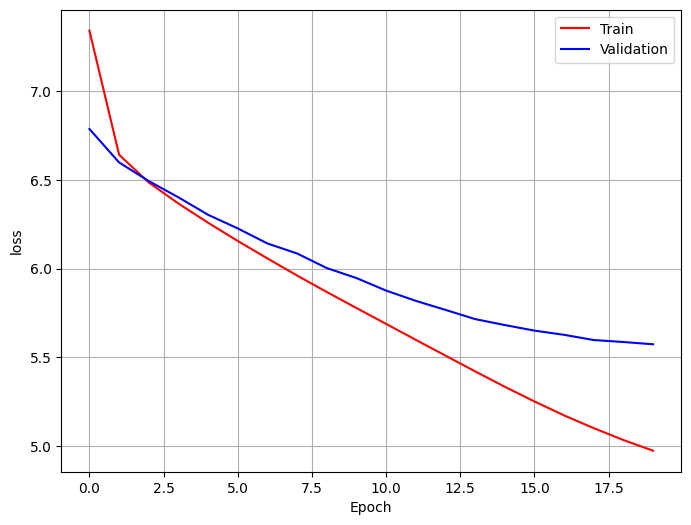

In [44]:
plt.figure(figsize=(8, 6))

plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

# 🔴 **Test**

🔰 Test your model using data from the test set

In [45]:
model = LanguageModel(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_dim=hidden_dim,
                      num_layers=num_layers, dropout_rate=dropout_rate)

state_dict = torch.load('best_model.pt')
model.load_state_dict(state_dict)
model.to(device)

# Evaluate the model on the test set
test_loss, test_perplexity, test_accuracy = evaluate(
    model=model,
    test_loader=test_loader,
    loss_fn=criterion,
    perplexity_metric=perplexity_metric,
    accuracy_metric=accuracy_metric,
    device=device
)

print(f"Test: Loss = {test_loss:.4f}, Perplexity = {test_perplexity:.4f}, Accuracy = {test_accuracy:.4f}")


Test: Loss = 5.6088, Perplexity = 200.1197, Accuracy = 0.2193


# 🔴 **Generate**

🔰 Your mission is to write a `generate` function and use a desired sentence to evaluate the model

In [48]:
import random
def generate_multiple(prompts, max_seq_len, temperature, model, tokenizer, vocab, seed=None):
    if seed is not None:
        random.seed(seed)
        torch.manual_seed(seed)

    generated_texts = []

    model.eval()
    with torch.no_grad():
        for prompt in prompts:
            prompt_tokens = [vocab[token] for token in tokenizer(prompt)]
            generated_tokens = prompt_tokens.copy()

            for _ in range(max_seq_len):

                input_tensor = torch.tensor([generated_tokens], dtype=torch.long).to(next(model.parameters()).device)

                outputs = model(input_tensor)
                logits = outputs[:, -1, :]

                logits /= temperature
                probabilities = torch.softmax(logits, dim=-1)
                next_token = torch.multinomial(probabilities, num_samples=1).item()

                generated_tokens.append(next_token)

                if next_token == vocab["<eos>"]:
                    break

            generated_text = " ".join([vocab.get_itos()[token] for token in generated_tokens])
            generated_texts.append((prompt, generated_text))

    return generated_texts


In [49]:
# Load the model
model_path = 'best_model.pt'
state_dict = torch.load(model_path)
model.load_state_dict(state_dict)
model.to(device)
model.eval()

dataset_samples = [
    "Once upon a time",
    "The journey begins with",
    "Deep in the forest",
    "In the realm of science fiction"
]

max_seq_len = 50
temperature = 1.0
seed = 42

generated_texts = generate_multiple(dataset_samples, max_seq_len, temperature, model, tokenizer, vocab, seed)

for i, (prompt, generated_text) in enumerate(generated_texts):
    print(f"Prompt {i + 1}: {prompt}")
    print(f"Generated Text {i + 1}: {generated_text}\n")


Prompt 1: Once upon a time
Generated Text 1: once upon a time . mx in search of fallen in a job by attempting to control on 20 september 2014 , while the count of abrams ' s officers in an attempt to be launched in july 1841 . in an attempt sharing the submarine to paid canoeing to 5 knots ( 120

Prompt 2: The journey begins with
Generated Text 2: the journey begins with wood and reshammiya . he notes that as eliminating it is , keats ' s persian style in god of war @-@ like @-@ war god with réunion could not be possible . = = = publication career = = = the catechism guidance = = = plans to become

Prompt 3: Deep in the forest
Generated Text 3: deep in the forest but has also attracted a voiceover and tourism and not zhou ' s temple . another story is distant and that each man ' s retreated off is a day continental rule . tintin was first depicted in appointment , symbolism the frescoes vectors and disparaging fathers for each other

Prompt 4: In the realm of science fiction
Generated 